<a href="https://colab.research.google.com/github/oliveiragiovana/modelo-de-ising/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-26-4548f3192895>:6: RuntimeWarning: invalid value encountered in power
  m0 = (1-(np.sinh(2/T0))**(-4))**(1/8)


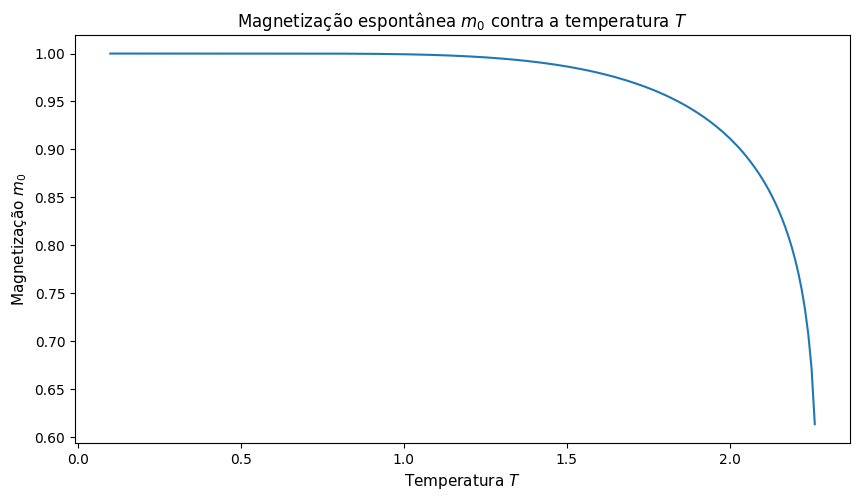

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

T0 = np.arange(0.1,1000,0.01)
m0 = (1-(np.sinh(2/T0))**(-4))**(1/8)

fig, ax = plt.subplots(figsize=(5,2.7))

ax.plot(T0, m0)
ax.set_title(r"Magnetização espontânea $m_0$ contra a temperatura $T$")
ax.set_xlabel(r"Temperatura $T$", fontsize=11)
ax.set_ylabel(r"Magnetização $m_0$", fontsize=11)
#ax.grid()

fig.set_size_inches(10,5.4)
fig.set_dpi(100)

In [ ]:
def metodomc(config, beta, N):
  '''
  Método Monte Carlo usando o algoritm Metrópolis
  '''

  for i in range(N):
    for j in range(N):
      a = np.random.randint(0,N)
      b = np.random.randint(0,N)
      s = config[a,b]
      nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
      cost = 2 * s * nb

      if cost < 0:
        s *= -1
      elif np.random.rand() < np.exp(-cost * beta):
        s *= -1
      config[a,b] = s
  return config 

In [ ]:
def calcEnergia(config, N):
  '''
  Energia de uma dada configuração
  '''
  energia = 0
  for i in range(len(config)):
    for j in range(len(config)):
      S = config[i,j]
      nb = config[(i+1)%N,j] + config[i,(j+1)%N] + config[(i-1)%N,j] + config[i,(j-1)%N]
      energia += -nb * S
  return energia/2 # para compensar a dupla-contagem

In [ ]:
def calcMag(config):
  '''
  Magnetização de uma dada configuração
  '''
  mag = np.sum(config)
  mag = abs(mag)
  return mag

In [ ]:
nt = 100  # número de pontos da temperatura
N = 10  # tamanho da rede, N x N
Ms = []
#eqPassos = 10 # número de trocas por Monte Carlo para equilíbrio
mcPassos = 100 # número de trocar por Monte Carlo para cálculo ???

T = np.linspace(0.1,4.5,nt)

while N <= 60:
  E, M = np.zeros(nt), np.zeros(nt)
  n1 = 1.0/(mcPassos*N*N) # dividir pelo número de amostras e pelo tamanho do sistema para valores intensivos ???

  for tt in range(nt):
    config = np.ones((N,N)) #inicializar
    E1 = M1 = 0
    iT = 1.0 / T[tt]

    for i in range(mcPassos):
      metodomc(config, iT, N)
      Ene = calcEnergia(config, N) # calcula a energia
      Mag = calcMag(config) # calcula a magnetização

      E1 = E1 + Ene
      M1 = M1 + Mag

    # dividir pelo número de redes e interações para obter valores intensivos
    E[tt] = n1 * E1
    M[tt] = n1 * M1 
  
  Ms.append(M)
  N += 10

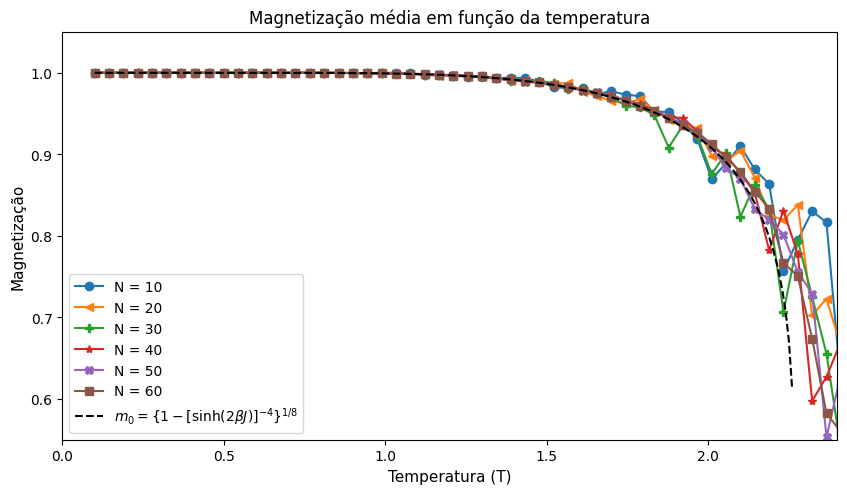

In [ ]:
fig, ax2 = plt.subplots(figsize=(5,2.7))

ax2.plot(T, Ms[0], marker="o", label = "N = 10")
ax2.plot(T, Ms[1], marker="<", label = "N = 20")
ax2.plot(T, Ms[2], marker="P", label = "N = 30")
ax2.plot(T, Ms[3], marker="*", label = "N = 40")
ax2.plot(T, Ms[4], marker="X", label = "N = 50")
ax2.plot(T, Ms[5], marker="s", label = "N = 60")
ax2.plot(T0, m0, label = r"$m_0=\{1-[\sinh{(2\beta J)}]^{-4}\}^{1/8}$", linestyle="--", color = "black")
ax2.set_title("Magnetização média em função da temperatura")
ax2.set_xlabel("Temperatura (T)", fontsize=11)
ax2.set_ylabel("Magnetização", fontsize=11)
#ax2.grid()
ax2.legend()

ax2.set_xlim(0, 2.4)
ax2.set_ylim(0.55, 1.05)

fig.set_size_inches(10,5.4)
fig.set_dpi(100)